In [11]:
import pandas as pd
import numpy as np
import json
import graphviz
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from pprint import pprint
from pathlib import Path

pd.set_option("display.max_rows",6)

%matplotlib inline

In [15]:
aps_path = Path('./aps/notebooks').absolute()
print(aps_path)


D:\Dev\APS\aps\notebooks


In [8]:
# analysis of entire data set
df_train_data = pd.read_csv(aps_path / 'varsom_numdata.csv', index_col=0)

FileNotFoundError: File b'varsom_train_data.csv' does not exist

In [16]:
# used to train and test
df_train_data = pd.read_csv(aps_path / 'varsom_train_data.csv', index_col=0)
df_test_data = pd.read_csv(aps_path / 'varsom_test_data.csv', index_col=0)

df_train_target = pd.read_csv(aps_path / 'varsom_train_target.csv', index_col=0)
df_test_target = pd.read_csv(aps_path / 'varsom_test_target.csv', index_col=0)

In [17]:
%pwd

'D:\\Dev\\APS'

In [18]:
df_train_data.head(5)

,AvalancheProblems_0_AvalProbabilityId,AvalancheProblems_0_Class_AvalDistributionId,AvalancheProblems_0_AvalTriggerSimpleId,AvalancheProblems_0_AvalancheProblemId,AvalancheProblems_0_Class_AvalancheProblemTypeId,AvalancheProblems_0_AvalancheTypeId,AvalancheProblems_0_DestructiveSizeExtId,AvalancheProblems_1_Class_AvalDistributionId,AvalancheProblems_1_Class_AvalancheProblemTypeId,ValidFrom,Wind_Speed_Num,Wind_Direction_Num,Temperature_masl
index,,,,,,,,,,,,,
150,3,2,10,1,6,10,2,2,2,2018-04-30T00:00:00,4,4,1800
30,3,2,10,1,6,10,2,1,7,2017-12-31T00:00:00,4,5,1800
208,3,2,21,1,6,10,2,0,0,2017-12-27T00:00:00,6,7,1400
342,3,2,22,1,2,20,2,1,4,2018-05-10T00:00:00,6,4,1400
288,2,2,10,2,7,10,3,3,6,2018-03-17T00:00:00,2,0,1400


In [19]:
df_train_data.columns.values

array(['AvalancheProblems_0_AvalProbabilityId',
       'AvalancheProblems_0_Class_AvalDistributionId',
       'AvalancheProblems_0_AvalTriggerSimpleId',
       'AvalancheProblems_0_AvalancheProblemId',
       'AvalancheProblems_0_Class_AvalancheProblemTypeId',
       'AvalancheProblems_0_AvalancheTypeId',
       'AvalancheProblems_0_DestructiveSizeExtId',
       'AvalancheProblems_1_Class_AvalDistributionId',
       'AvalancheProblems_1_Class_AvalancheProblemTypeId', 'ValidFrom',
       'Wind_Speed_Num', 'Wind_Direction_Num', 'Temperature_masl'],
      dtype=object)

In [20]:
# Check if there are no weired values.
for col in df_train_data.drop(['ValidFrom'], axis=1).columns.values:
    print(col, ': ', df_train_data[col].unique())

AvalancheProblems_0_AvalProbabilityId :  [3 2 5]
AvalancheProblems_0_Class_AvalDistributionId :  [2 3 1]
AvalancheProblems_0_AvalTriggerSimpleId :  [10 21 22]
AvalancheProblems_0_AvalancheProblemId :  [1 2 3]
AvalancheProblems_0_Class_AvalancheProblemTypeId :  [6 2 7 5 4]
AvalancheProblems_0_AvalancheTypeId :  [10 20]
AvalancheProblems_0_DestructiveSizeExtId :  [2 3 1]
AvalancheProblems_1_Class_AvalDistributionId :  [2 1 0 3]
AvalancheProblems_1_Class_AvalancheProblemTypeId :  [2 7 0 4 6 5]
Wind_Speed_Num :  [ 4  6  2  9  5  7  8 10]
Wind_Direction_Num :  [4 5 7 0 1 3 6 2 8]
Temperature_masl :  [1800 1400]


In [21]:
### Remove the "2|" in column Rainfall_Average
#df_train_data = df_train_data[df_train_data['Rainfall_Average'] != '2|']        
#print(df_train_data['Rainfall_Average'].unique())

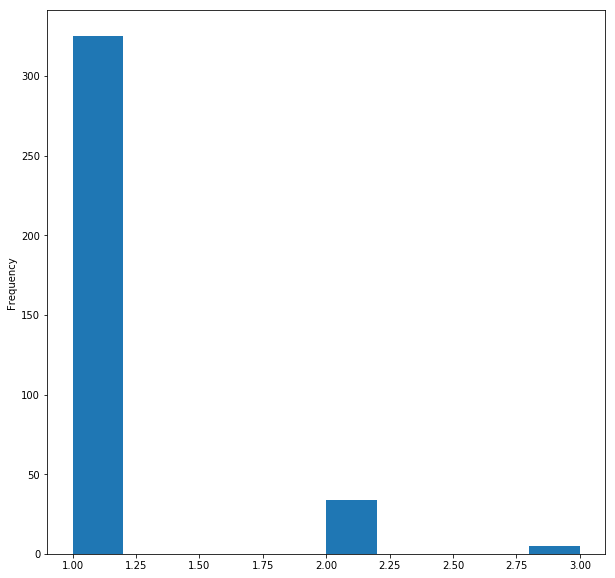

In [22]:
#df_train_data.plot(x='ValidFrom', y='AvalancheProblems_0_AvalancheProblemId', figsize=(16,10), kind='bar')
df_train_data['AvalancheProblems_0_AvalancheProblemId'].plot(figsize=(10,10), kind='hist')
#df_train_data.plot(subplots=True, figsize=(16,20))

In [25]:
#df_train_target = df_train_data.filter(['DangerLevel'], axis=1)
#df_train_data = df_train_data.drop(['DangerLevel'], axis=1)

data = np.array(df_train_data.drop(['ValidFrom'], axis=1).values, dtype=float)
target = np.array(df_train_target.values, dtype=float)
print(df_train_data.drop(['ValidFrom'], axis=1).columns.values,
     df_train_target.columns.values)


['AvalancheProblems_0_AvalProbabilityId'
 'AvalancheProblems_0_Class_AvalDistributionId'
 'AvalancheProblems_0_AvalTriggerSimpleId'
 'AvalancheProblems_0_AvalancheProblemId'
 'AvalancheProblems_0_Class_AvalancheProblemTypeId'
 'AvalancheProblems_0_AvalancheTypeId'
 'AvalancheProblems_0_DestructiveSizeExtId'
 'AvalancheProblems_1_Class_AvalDistributionId'
 'AvalancheProblems_1_Class_AvalancheProblemTypeId' 'Wind_Speed_Num'
 'Wind_Direction_Num' 'Temperature_masl'] []


In [24]:
clf = tree.DecisionTreeClassifier(min_samples_leaf=8)
clf = clf.fit(data, target)

NameError: name 'data' is not defined

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names = df_train_data.drop(['ValidFrom'], axis=1).columns.values,
                                class_names = ['low', 'moderate', 'considerable', 'high'],
                                #proportion = True, # show precentages instead of members
                                label = "root",
                                filled=True, rounded=True, special_characters=True                                
                                )
graph = graphviz.Source(dot_data) 
graph.render("varsom") 

## Learning avalanche problems by meteorological factors

In [ ]:
df_train_data2 = pd.read_csv('varsel_nordvestlandet_17_18.csv', index_col=0)

pprint(df_train_data2.columns.values)

In [ ]:
### Remove the "2|" in column Rainfall_Average
df_train_data2 = df_train_data2[df_train_data2['Rainfall_Average'] != '2|']        
#print(df_train_data['Rainfall_Average'].unique())

In [ ]:
for col in df_train_data2.columns.values:
    print(col, ': ', df_train_data2[col].unique())

In [ ]:
# remove unwanted columns
df_train_target2 = df_train_data2.filter(['AvalancheProblems_0_Class_AvalancheProblemTypeId'], axis=1) 
df_train_data2 = df_train_data2.filter(['Rainfall_Most_exposed_area',
                                        'Rainfall_Average',
                                        'Wind_Speed_Num',
                                        'Wind_Direction_Num',
                                        'Temperature_Min',
                                        'Temperature_Max',
                                        'Temperature_masl',
                                        'Freezing_Level_masl'], axis=1)

In [ ]:
# create new data columns with previous days weather data
df_train_data2['Rainfall_Most_exposed_area_-1day'] = 0 # precip on the day before

for index, row in df_train_data2.iterrows():
    try:
        df_train_data2.loc[index, 'Rainfall_Most_exposed_area_-1day'] = df_train_data2.loc[index-1, 'Rainfall_Most_exposed_area']
    except KeyError:
        print(index-1)

In [ ]:
# get the correct target labels
with open(r'../config/snoskred_keys.json') as jdata:
    snoskred_keys = json.load(jdata)
    
enc = LabelEncoder()
label_encoder = enc.fit(df_train_target2['AvalancheProblems_0_Class_AvalancheProblemTypeId'])
print ("Categorical classes:", label_encoder.classes_)
class_names2 = []
for l in label_encoder.classes_:
    class_names2.append(snoskred_keys['Class_AvalancheProblemTypeName'][str(l)])
print(class_names2)

In [ ]:
data2 = np.array(df_train_data2.values, dtype=float)
target2 = np.array(df_train_target2.values, dtype=float)

clf2 = tree.DecisionTreeClassifier(min_samples_leaf=8)
clf2 = clf2.fit(data2, target2)

dot_data2 = tree.export_graphviz(clf2, out_file=None,
                                feature_names = df_train_data2.columns.values,
                                class_names = class_names2,
                                #proportion = True, # show precentages instead of members
                                label = "root",
                                filled=True, rounded=True, special_characters=True                                
                                )
graph2 = graphviz.Source(dot_data2) 
graph2.render("avalanche_problem_meteo") 

## For example on split into test and traininng data to run a prediction see Case_Nordvestlandet_Meteo_Problem.ipynb

## Same, but with DecisionTreeRegressor

In [ ]:
clf2 = tree.DecisionTreeRegressor()
clf2 = clf2.fit(data, target)

dot_data2 = tree.export_graphviz(clf2, out_file=None,
                                feature_names = df_train_data.drop(['ValidFrom', 'ValidTo'], axis=1).columns.values,
                                filled=True, rounded=True, special_characters=True                                
                                )
graph2 = graphviz.Source(dot_data2) 
graph2.render("varsom_reg") 